<div >
<img src = "figs/ans_banner_1920x200.png" />
</div>

# Caso-taller:  PCA para estudiar la dimensionalidad de la calidad de vida en las ciudades

En este caso-taller vamos a aplicar PCA en el estudio de calidad de vida en diferentes ciudades. Para ello, haremos uso de los datos que surgen del Almanaque Calificado de Lugares. En este Almanaque Boyer y Savageau calificaron 329 ciudades de acuerdo con los siguientes nueve criterios:

   - Clima y Terreno
   - Alojamiento
   - Cuidado de la salud y el medio ambiente
   - Crimen
   - Transporte
   - Educación
   - Artes
   - Recreación
   - Economía

Con tantas variables disponibles, la matriz de dispersión puede resultar muy grande para estudiarla e interpretarla adecuadamente. Habría demasiadas correlaciones bivariadas entre las variables a considerar. Para interpretar los datos de una forma más significativa es necesario reducir el número de variables a unas pocas dimensiones, y para ello en este ejercicio recurriremos al análisis de componentes principales.


## Instrucciones generales

1. Para desarrollar el *cuaderno* primero debe descargarlo junto al archivo de soporte.

2. Para responder cada inciso deberá utilizar el espacio debidamente especificado.

3. La actividad será calificada sólo si sube el *cuaderno* de jupyter notebook con extensión `.ipynb` en la actividad designada como "entrega calificada por el personal".

4. El archivo entregado debe poder ser ejecutado localmente por el tutor. Sea cuidadoso con la especificación de la ubicación de los archivos de soporte, guarde la carpeta de datos en la misma ruta de acceso del cuaderno, por ejemplo: `data/archivo_de_soporte.csv`.

## Desarrollo


### 1. Carga de datos

En la carpeta `data` se encuentra el archivo `lugares.csv` cargue estos datos en su *cuaderno*.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files # Para cargar la base de datos desde collab.

In [ ]:
# Utilice este espacio para escribir el código.
# data=pd.read_csv("data/lugares.csv") # Opción para cargar la base de datos localmente.
uploaded = files.upload()

Saving lugares.csv to lugares.csv


In [ ]:
data=pd.read_csv("lugares.csv")
data.head(5)

,Ciudad,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,"Abilene,TX",521,6200,237,923,4031,2757,996,1405,7633
1,"Akron,OH",575,8138,1656,886,4883,2438,5564,2632,4350
2,"Albany,GA",468,7339,618,970,2531,2560,237,859,5250
3,"Albany-Schenectady-Troy,NY",476,7908,1431,610,6883,3399,4655,1617,5864
4,"Albuquerque,NM",659,8393,1853,1483,6558,3026,4496,2612,5727


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 329 entries, 0 to 328
Data columns (total 10 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Ciudad                                   329 non-null    object
 1   Clima y Terreno                          329 non-null    int64 
 2   Alojamiento                              329 non-null    int64 
 3   Cuidado de la salud y el medio ambiente  329 non-null    int64 
 4   Crimen                                   329 non-null    int64 
 5   Transporte                               329 non-null    int64 
 6   Educación                                329 non-null    int64 
 7   Artes                                    329 non-null    int64 
 8   Recreación                               329 non-null    int64 
 9   Economía                                 329 non-null    int64 
dtypes: int64(9), object(1)
memory usage: 25.8+ KB


### 2.  Análisis descriptivo de las variables.

Para el análisis descriptivo haga uso de estadísticas descriptivas y matrices de correlación. Indique además cuantas gráficas de dispersión bivariadas debería examinar con este número de variables.

Explique porqué es importante conocer las estadísticas descriptivas y como contribuyen al ejercicio posterior de Análisis de Componentes Principales.

Tenga en cuenta que para las variables, a excepción de la alojamiento y crimen, cuanto mayor sea el puntaje, mejor. Por el contrario; para alojamiento y crimen, mientras más bajo sea el puntaje, mejor. También, mientras algunas comunidades podrían calificar mejor en las artes, otras podrían calificar mejor en otras áreas como tener una tasa de criminalidad más baja y buenas oportunidades educativas.

In [ ]:
# Utilice este espacio para escribir el código.
num_cols = [
    "Clima y Terreno",
    "Alojamiento",
    "Cuidado de la salud y el medio ambiente",
    "Crimen",
    "Transporte",
    "Educación",
    "Artes",
    "Recreación",
    "Economía",
]
X = data[num_cols].copy()
X.head(5)

,Clima y Terreno,Alojamiento,Cuidado de la salud y el medio ambiente,Crimen,Transporte,Educación,Artes,Recreación,Economía
0,521,6200,237,923,4031,2757,996,1405,7633
1,575,8138,1656,886,4883,2438,5564,2632,4350
2,468,7339,618,970,2531,2560,237,859,5250
3,476,7908,1431,610,6883,3399,4655,1617,5864
4,659,8393,1853,1483,6558,3026,4496,2612,5727


En primer lugar se construye una base de datos con solo las columnas numéricas de las calificaciones de las observaciones (en este caso, las ciudades).

In [ ]:
desc = X.describe().T
desc["median"] = X.median()
desc["iqr"] = X.quantile(0.75) - X.quantile(0.25)
desc["missing"] = X.isna().sum()
desc = desc[["count","mean","std","min","25%","median","75%","max","iqr","missing"]]
print("\n=== Estadísticas descriptivas ===")
print(desc)


=== Estadísticas descriptivas ===
                                         count         mean          std  \
Clima y Terreno                          329.0   538.732523   120.808259   
Alojamiento                              329.0  8346.559271  2385.262622   
Cuidado de la salud y el medio ambiente  329.0  1185.738602  1003.002036   
Crimen                                   329.0   961.054711   357.154186   
Transporte                               329.0  4210.082067  1451.179240   
Educación                                329.0  2814.887538   320.792953   
Artes                                    329.0  3150.884498  4642.283738   
Recreación                               329.0  1845.957447   807.888171   
Economía                                 329.0  5525.364742  1084.468523   

                                            min     25%  median     75%  \
Clima y Terreno                           105.0   480.0   542.0   592.0   
Alojamiento                              5159.0  6760.

A continuación, se calcularon las estadísticas descriptivas de las variables. Se observa que las medias y desviaciones estándar reflejan una alta variabilidad de los datos por las grandes diferencias en magnitud y dispersión entre indicadores. Por ejemplo, “Clima y Terreno” presenta un promedio (538) y una variabilidad baja (120), en comparación con otras variables, mientras que “Artes” y “Alojamiento” muestran altos valores máximos y amplias desviaciones estándar, lo que indica desigualdad significativa entre ciudades. Finalmente no se encuentra ningún dato faltante.

In [ ]:
corr_pearson  = X.corr(method="pearson")
corr_spearman = X.corr(method="spearman")

print("\n=== Matriz de correlación (Pearson) ===")
print(corr_pearson.round(3))
print("\n=== Matriz de correlación (Spearman) ===")
print(corr_spearman.round(3))


=== Matriz de correlación (Pearson) ===
                                         Clima y Terreno  Alojamiento  \
Clima y Terreno                                    1.000        0.386   
Alojamiento                                        0.386        1.000   
Cuidado de la salud y el medio ambiente            0.213        0.453   
Crimen                                             0.192        0.134   
Transporte                                         0.079        0.272   
Educación                                          0.065        0.198   
Artes                                              0.227        0.449   
Recreación                                         0.214        0.422   
Economía                                          -0.100        0.269   

                                         Cuidado de la salud y el medio ambiente  \
Clima y Terreno                                                            0.213   
Alojamiento                                                 

En las correlaciones se evidencia relaciones importantes, como la fuerte correlación positiva entre “Cuidado de la salud y el medio ambiente” y “Artes” (0.87), lo que sugiere que las ciudades con mejores servicios de salud y medio ambiente también tienden a tener mayor oferta cultural. Asimismo, se observan correlaciones moderadas entre “Alojamiento” y otras variables, mientras que “Economía” tiene relaciones débiles o nulas con la mayoría de los indicadores.

In [ ]:
p = X.shape[1] #Columnas del df data
n_pairs = p * (p - 1) // 2 #total de graficas a evaluar
print(f"Gráficas de dispersión bivariadas a examinar: {n_pairs} (con p={p})")

Gráficas de dispersión bivariadas a examinar: 36 (con p=9)


Teniendo en cuenta la cantidad de características, si se quieren analizar por medio de gráficas de dispersión bivariadas se deben realizar 36. Por lo anterior, es necesario hacer una reducción de la dimensionalidad.

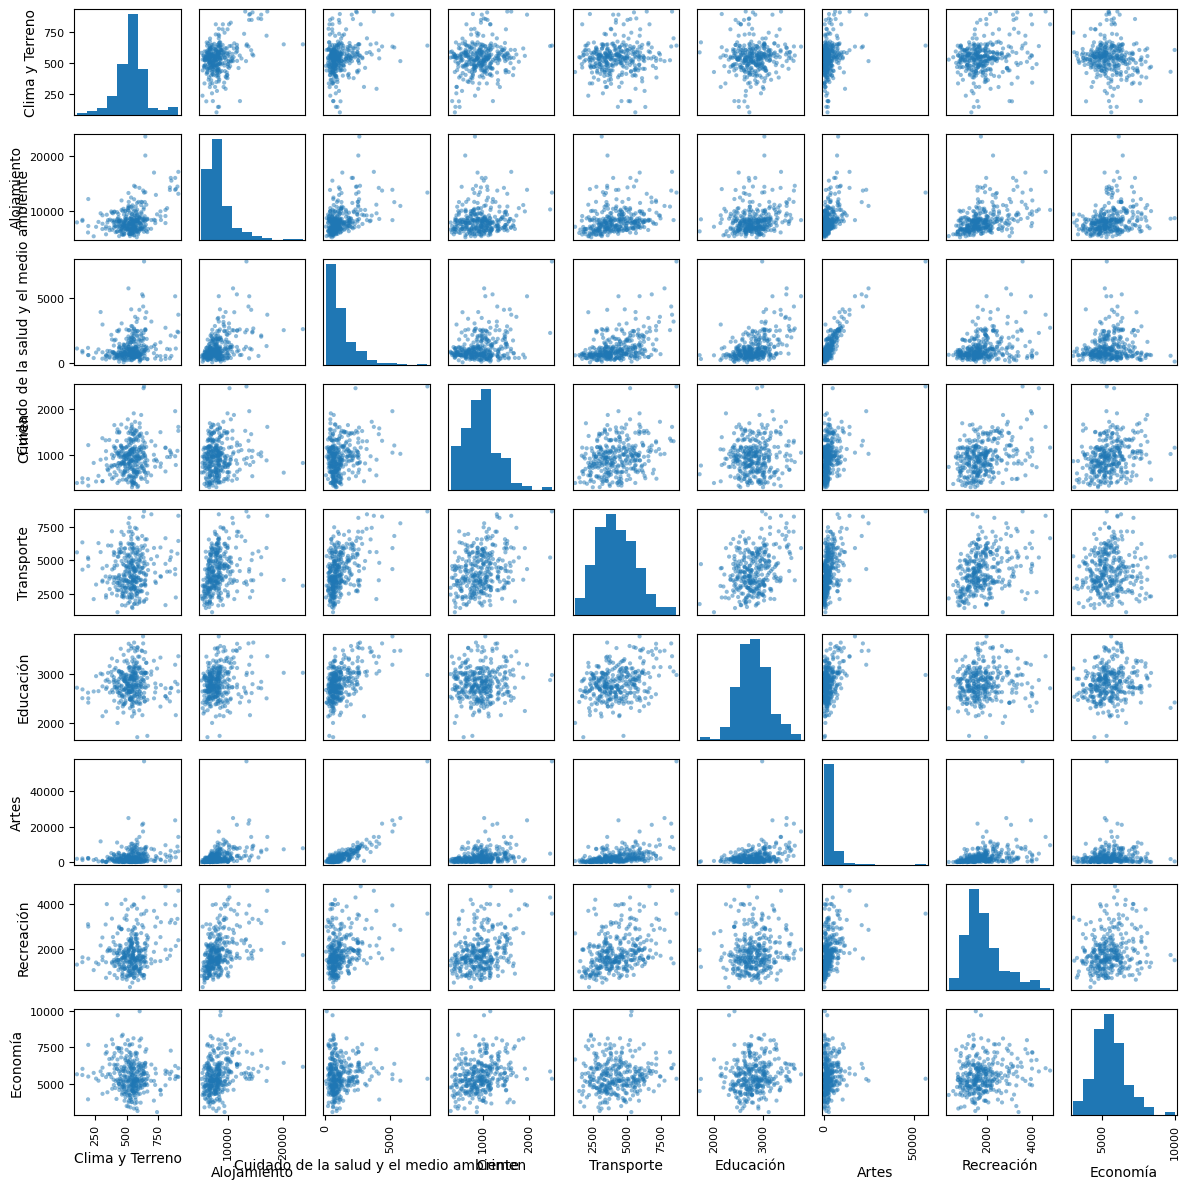

In [ ]:
pd.plotting.scatter_matrix(X, figsize=(12, 12), diagonal="hist")
plt.tight_layout()
plt.savefig("scatter_matrix.png", dpi=150)

Con respecto a los histogramas, se pueden evidenciar ciertas distribuciones normales dentro de las variables, con ciertas asimetrias positivas que corresponden de variables como “Cuidado de la salud y el medio ambiente” y “Artes”. Esto último sugiere que la mayoría de las ciudades tienen valores bajos o moderados, con pocos casos extremos muy altos.

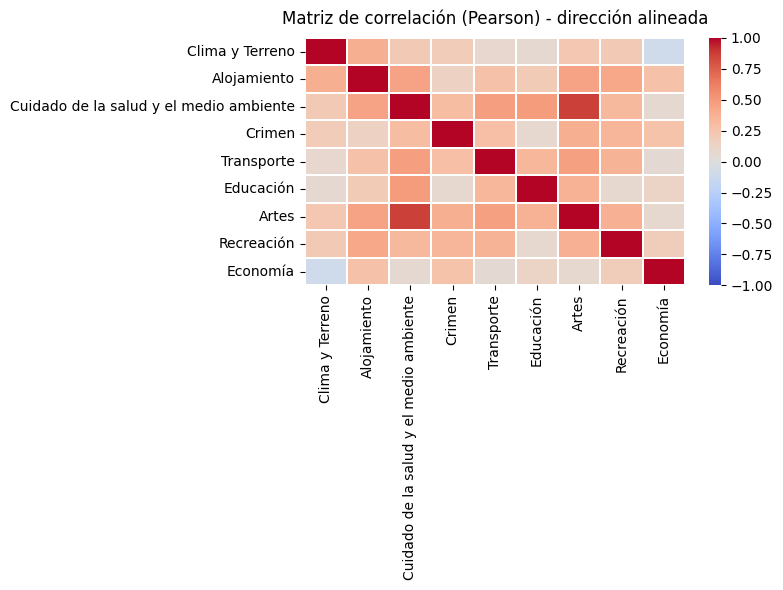

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    corr_pearson,        # df correlaciones
    vmin=-1, vmax=1,
    cmap="coolwarm",
    cbar=True,
    linewidths=0.3
)
ax.set_title("Matriz de correlación (Pearson) - dirección alineada", pad=10)
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig("corr_heatmap.png", dpi=150)

En conclusión, en esta sesión se obtiene que:
1. De las Estadísticas descriptivas se puede analizar que las escalas de las variables estan super distintas, es decir, tenemos escalas en cientos, otras en miles y otras en decenas de miles. Se deben estandarizar las variables para poder aplicar PCA. Adicional, se tienen valores sesgados o con outlier muy grandes. No se tienen ningun dato incompleto

2. En cuanto a las correlaciones, se tienen asociaciones fuertes (tanto en perason como en spearman) de salud y artes, transporte y artes, alojamiento con recreacion y salud y educacion. Se debe multiplicar Alojamiento y Crimen por –1 antes del PCA; así, “más alto = mejor”

3. Gráficas de dispersión bivariadas a examinar: 36 (con p=9)


### 3.  Cálculo y selección de componentes principales.

Utilizando Álgebra Lineal, calcule los eigen valores y los eigen vectores, a partir de ellos obtenga los Componentes Principales. Tenga en cuenta de estandarizar las variables y explicar por qué es importante no omitir este paso.

Luego, examine los valores propios para determinar cuántos componentes principales se deben considerar. Explique el criterio que utilizó para la elección y justifique su respuesta.

#### Seccion de estandarizacion, temas de signos y transformacion log para sesgos

In [ ]:
from sklearn.preprocessing import StandardScaler

APPLY_LOG = True          # Aplica log1p a columnas sesgadas
SKEW_THRESH = 1.0         # Umbral de asimetría para decidir log
APPLY_WINSOR = False
WINSOR_LO = 0.01
WINSOR_HI = 0.99


num_cols = [
    "Clima y Terreno",
    "Alojamiento",
    "Cuidado de la salud y el medio ambiente",
    "Crimen",
    "Transporte",
    "Educación",
    "Artes",
    "Recreación",
    "Economía",
]

In [ ]:
if APPLY_WINSOR:
    for c in num_cols:
        lo, hi = X[c].quantile([WINSOR_LO, WINSOR_HI])
        X[c] = X[c].clip(lower=lo, upper=hi)

#Transformación log para columnas con fuerte asimetría
if APPLY_LOG:
    skewness = X.skew(numeric_only=True)
    skewed_cols = [c for c in num_cols if skewness[c] > SKEW_THRESH]
    for c in skewed_cols:
        min_val = X[c].min()
        if min_val <= -1:
            X[c] = np.log1p(X[c] - min_val + 1.0)
        else:
            X[c] = np.log1p(X[c])

#"más alto = mejor"
for c in ["Alojamiento", "Crimen"]:
    X[c] = -X[c]

#Estandarizacion
scaler = StandardScaler()
X_std_array = scaler.fit_transform(X)
X_std = pd.DataFrame(X_std_array, columns=num_cols, index=data.index)

Teniendo en cuenta los resultados en las estadísticas descriptivas, en esta sesión se realizó una estandarización para poder continuar con el cálculo y la selección de componentes principales. Esto se hace ncesario porque si no se estandariza, las variables con varianza grande dominarían los componentes, distorsionando la estructura. A continuación, se construye la matriz de correlación/covarianza:

In [ ]:
# Utilice este espacio para escribir el código.
#Matriz de correlación/covarianza
R = np.cov(X_std.values, rowvar=False)
R

array([[ 1.00304878, -0.36511221,  0.18192363, -0.19297385,  0.07936115,
         0.06471647,  0.21884316,  0.17650773, -0.10038787],
       [-0.36511221,  1.00304878, -0.43348004,  0.14986286, -0.32527164,
        -0.21760855, -0.51018701, -0.46210628, -0.29120751],
       [ 0.18192363, -0.43348004,  1.00304878, -0.2089142 ,  0.44893702,
         0.48194865,  0.68085169,  0.25509885,  0.02281955],
       [-0.19297385,  0.14986286, -0.2089142 ,  1.00304878, -0.28745214,
        -0.07464314, -0.35041691, -0.32059672, -0.26078738],
       [ 0.07936115, -0.32527164,  0.44893702, -0.28745214,  1.00304878,
         0.33701686,  0.55411623,  0.39509479,  0.05942738],
       [ 0.06471647, -0.21760855,  0.48194865, -0.07464314,  0.33701686,
         1.00304878,  0.36073179,  0.10049965,  0.12006529],
       [ 0.21884316, -0.51018701,  0.68085169, -0.35041691,  0.55411623,
         0.36073179,  1.00304878,  0.49802627,  0.10717438],
       [ 0.17650773, -0.46210628,  0.25509885, -0.32059672,  0

Luego de esto, se realiza la descomposición espectral.

In [ ]:
#Descommposicion espectral
eigvals, eigvecs = np.linalg.eigh(R)
idx = np.argsort(eigvals)[::-1]
eigvals = eigvals[idx]
eigvecs = eigvecs[:, idx]
eigvecs

array([[-1.94618244e-01,  4.32877953e-02,  7.43022561e-01,
        -2.51339314e-01, -3.85405858e-01,  2.45202256e-01,
        -1.25556487e-01, -3.42054373e-01,  5.97367767e-02],
       [ 3.83584036e-01, -1.65320704e-01, -1.91248896e-01,
         4.79379673e-01, -2.90910008e-01,  1.13632179e-01,
         1.81999910e-01, -6.46452773e-01,  1.02884797e-01],
       [-4.08105386e-01, -3.71715198e-01, -6.42444794e-02,
        -5.93856626e-02, -9.02806056e-02, -5.28447565e-01,
         7.11235568e-02, -1.05745325e-01,  6.19657764e-01],
       [ 2.61847243e-01, -4.26822832e-01,  2.67205801e-02,
        -4.68306361e-01,  6.08013716e-01,  1.08567783e-01,
        -9.69178065e-02, -3.71971790e-01,  3.12074000e-03],
       [-3.77687656e-01, -1.45037663e-01, -1.51717183e-01,
         3.81334114e-01,  1.57599043e-01,  3.89684295e-01,
        -6.90608023e-01, -3.82059455e-02,  1.13101092e-01],
       [-2.77715361e-01, -4.27463957e-01, -3.53819294e-01,
        -2.92749601e-01, -3.36171663e-01,  5.114629

Finalmente, a partir de los eigenvalores, se calcula la varianza explicada:

In [ ]:
#Varianza explicada
explained = eigvals / eigvals.sum()
cum_explained = np.cumsum(explained)

ev_df = pd.DataFrame({
    "eigenvalue": eigvals,
    "explained_var": explained,
    "cum_explained_var": cum_explained
}, index=[f"PC{i+1}" for i in range(len(eigvals))]).round(4)
print("=== Eigenvalores y varianza explicada ===")
print(ev_df)

=== Eigenvalores y varianza explicada ===
     eigenvalue  explained_var  cum_explained_var
PC1      3.3792         0.3743             0.3743
PC2      1.2272         0.1359             0.5103
PC3      1.1218         0.1243             0.6345
PC4      0.9029         0.1000             0.7345
PC5      0.7974         0.0883             0.8229
PC6      0.5463         0.0605             0.8834
PC7      0.4856         0.0538             0.9372
PC8      0.3122         0.0346             0.9718
PC9      0.2549         0.0282             1.0000


In [ ]:
#Scores y loadings
scores = X_std.values @ eigvecs
scores_df = pd.DataFrame(scores, index=X_std.index,
                         columns=[f"PC{i+1}" for i in range(len(eigvals))])

loadings = eigvecs * np.sqrt(eigvals)
loadings_df = pd.DataFrame(loadings, index=num_cols,
                           columns=[f"PC{i+1}" for i in range(len(eigvals))]).round(4)
print(f"Total de loadings: {len(loadings_df)}")
print("=== loadings (primeras PCs) ===")
print(loadings_df.iloc[:, :5])

Total de loadings: 9
=== loadings (primeras PCs) ===
                                            PC1     PC2     PC3     PC4  \
Clima y Terreno                         -0.3578  0.0480  0.7870 -0.2388   
Alojamiento                              0.7051 -0.1831 -0.2026  0.4555   
Cuidado de la salud y el medio ambiente -0.7502 -0.4118 -0.0680 -0.0564   
Crimen                                   0.4813 -0.4728  0.0283 -0.4450   
Transporte                              -0.6943 -0.1607 -0.1607  0.3623   
Educación                               -0.5105 -0.4735 -0.3748 -0.2782   
Artes                                   -0.8565 -0.1218  0.0004  0.1230   
Recreación                              -0.6447  0.3507  0.1227  0.1989   
Economía                                -0.2600  0.6406 -0.5241 -0.4169   

                                            PC5  
Clima y Terreno                         -0.3442  
Alojamiento                             -0.2598  
Cuidado de la salud y el medio ambiente -0.080

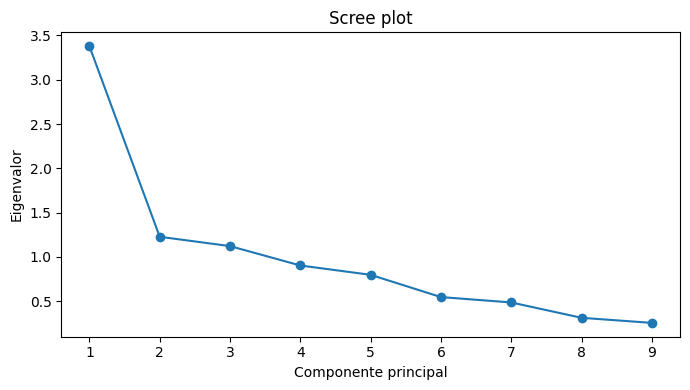

Sugerencias de k -> Kaiser: 3 | proporcion varianza explicada≥80%: 5 | scree plot Codo: 2


In [ ]:
#Selección de k
k_kaiser = int((eigvals > 1.0).sum())                          # Criterio de Kaiser
k_80 = int(np.argmax(cum_explained >= 0.80) + 1)               # ≥80% var. acumulada
second_diff = np.diff(eigvals, n=2)
k_elbow = int(np.argmax(second_diff) + 2)                      # Codo

plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigvals)+1), eigvals, marker="o")
plt.xlabel("Componente principal")
plt.ylabel("Eigenvalor")
plt.title("Scree plot")
plt.tight_layout()
plt.show()

print(f"Sugerencias de k -> Kaiser: {k_kaiser} | proporcion varianza explicada≥80%: {k_80} | scree plot Codo: {k_elbow}")

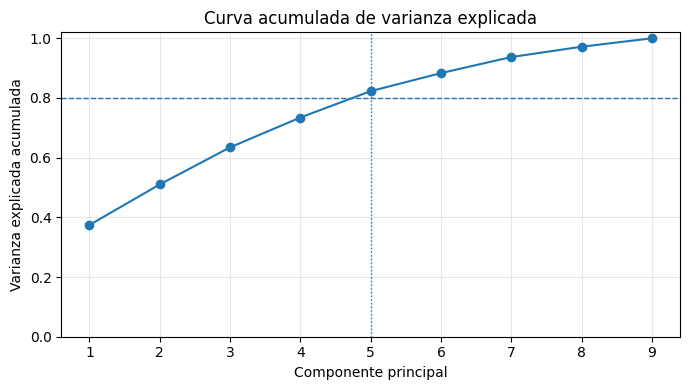

Componentes para ≥80% varianza: k = 5


In [ ]:
k_80 = int(np.argmax(cum_explained >= 0.80) + 1)

plt.figure(figsize=(7,4))
plt.plot(range(1, len(eigvals)+1), cum_explained, marker="o")
plt.axhline(0.80, linestyle="--", linewidth=1)
plt.axvline(k_80, linestyle=":", linewidth=1)
plt.ylim(0, 1.02)
plt.yticks(np.linspace(0,1,6))
plt.xlabel("Componente principal")
plt.ylabel("Varianza explicada acumulada")
plt.title("Curva acumulada de varianza explicada")
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

print(f"Componentes para ≥80% varianza: k = {k_80}")

1. Por el scree plot se puede identificar un codo entre 5 y 6 (de forma visual)
2. Por la proporcion de la varianza explicada y definiendo un umbral del 80% se puede identificar 5 componentes principales
3. Por el criterio de Kaiser solo retenemos componentes cuyos eigenvalores sean >1, entonces tendriamos 3 componentes

En conclusion, reuniendo los tres criterios anteriores, se decide utilizar 5 componentes principales.

### 4.  Interpretación de los componentes principales.

Logró reducir la dimensión en el ejercicio anterior? Si lo hizo, pueden los pesos obtenidos identificar dimensiones menores de los datos? Provea una interpretación a estas dimensiones, para ello puede utilizar gráficas y/o tablas.

In [ ]:
# Utilice este espacio para escribir el código.
k = 5
loadings_k = loadings_df.iloc[:, :k].copy()   # variables x PCs
scores_k = scores_df.iloc[:, :k].copy()       # n x PCs

In [ ]:
def top_loadings(load_df, pc_name, top=6, thr=0.35):
    s = load_df[pc_name]
    out = (pd.DataFrame({"variable": s.index,
                         "loading": s.values,
                         "abs_loading": s.abs().values})
           .sort_values("abs_loading", ascending=False))
    out["fuerte"] = out["abs_loading"] >= thr
    return out.head(top)

=== Top loadings PC1 ===
                                  variable  loading
6                                    Artes  -0.8565
2  Cuidado de la salud y el medio ambiente  -0.7502
1                              Alojamiento   0.7051
4                               Transporte  -0.6943
7                               Recreación  -0.6447
5                                Educación  -0.5105
3                                   Crimen   0.4813
0                          Clima y Terreno  -0.3578
8                                 Economía  -0.2600
=== Top loadings PC2 ===
                                  variable  loading
8                                 Economía   0.6406
5                                Educación  -0.4735
3                                   Crimen  -0.4728
2  Cuidado de la salud y el medio ambiente  -0.4118
7                               Recreación   0.3507
1                              Alojamiento  -0.1831
4                               Transporte  -0.1607
6             

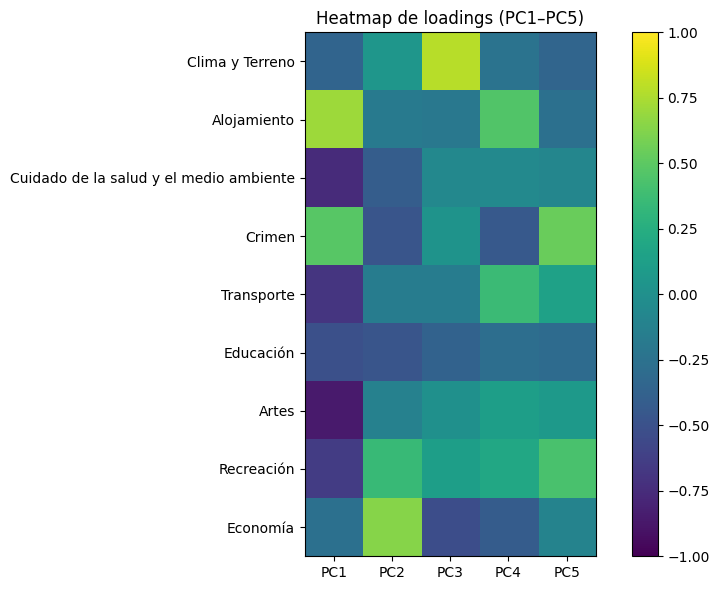

In [ ]:
for j in range(1, k+1):
    pc = f"PC{j}"
    print(f"=== Top loadings {pc} ===")
    print(top_loadings(loadings_k, pc, top=9, thr=0.35)[["variable","loading"]])

#Heatmap
fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.imshow(loadings_k.values, vmin=-1, vmax=1)
fig.colorbar(cax, ax=ax)
ax.set_xticks(range(k))
ax.set_yticks(range(loadings_k.shape[0]))
ax.set_xticklabels(loadings_k.columns)
ax.set_yticklabels(loadings_k.index)
ax.set_title("Heatmap de loadings (PC1–PC5)")
plt.tight_layout()
plt.show()

1. PC1 – Residencial vs vida de ciudad.
Distingue ciudades con buena vivienda y seguridad pero menos oferta urbana/cultural de las que tienen mucha cultura/servicios pero peor vivienda/seguridad.
(puntaje alto = más vivienda/seguridad, menos oferta urbana).

2. PC2 – Economía y ocio vs bienestar social.
Economía fuerte y recreación al frente, opuesto a educación, salud y seguridad.
(Alto = más dinamismo económico/ocio; bajo = mejor capital humano/bienestar).

3. PC3 – Clima/Terreno.
Un eje casi independiente: condiciones ambientales (clima/terreno) frente a economía y educación.

4. PC4 – Infraestructura de vivienda/transporte vs seguridad/economía.
Vivienda y movilidad a un lado, seguridad y economía al otro.

5. PC5 – Seguridad y ocio vs clima/educación/vivienda.
Contrasta seguridad + opciones de recreación con clima, educación y vivienda.

En síntesis, sí se logró reducir la dimensionalidad; los pesos obtenidos permiten agrupar los ejes conceptuales en grandes dimensiones:

* Calidad sociocultural y ambiental (PC1)

* Economía frente a educación y seguridad (PC2)

* Factores climáticos y geográficos (PC3)

### 5.   Detección de ciudades inusuales.

A partir de los Componentes Principales identifique las 5 ciudades calidad de vida inusualmente alta. En la distribución de calidad de vida  de la muestra que tan inusuales son? Cuáles son las dimensiones que hacen que estas ciudades tengan esta calidad de vida inusual?

In [ ]:
k = 5

scores_k = scores_df[[f"PC{i}" for i in range(1, k+1)]].values

#Vector de varianza explicada
if 'explained' in globals():
    expl_k = np.asarray(explained)[:k]
elif 'ev_df' in globals() and 'explained_var' in ev_df.columns:
    expl_k = ev_df['explained_var'].values[:k]
elif 'pca' in globals():
    expl_k = pca.explained_variance_ratio_[:k]
else:
    raise ValueError("Error")


In [ ]:
if 'X_std' in globals():
    benefit_index = X_std.mean(axis=1).values  # promedio de variables (todas “alto=mejor”)
    signs = np.sign(np.corrcoef(scores_k, benefit_index, rowvar=False)[-1, :-1])
else:
    Lk = loadings_df.iloc[:, :k].values
    signs = np.sign(Lk.mean(axis=0))
signs[signs == 0] = 1

scores_k_oriented = scores_k * signs

In [ ]:
weights = expl_k
qol = scores_k_oriented @ weights
qol_z = (qol - qol.mean()) / qol.std(ddof=1)
qol_pct = (pd.Series(qol).rank(method="average") - 0.5) / len(qol)

In [ ]:
contrib = scores_k_oriented * weights   # n x k
abs_sum = np.abs(contrib).sum(axis=1, keepdims=True)
share = contrib / abs_sum

In [ ]:
pc_names = [f"PC{i}" for i in range(1, k+1)]
contrib_df = pd.DataFrame(contrib, columns=pc_names)
share_df = pd.DataFrame(share, columns=[f"{c}_share" for c in pc_names])

In [ ]:
#indice de calidad de vida (QoL)
res = pd.concat(
    [data[["Ciudad"]].reset_index(drop=True),
     pd.Series(qol, name="QoL"),
     pd.Series(qol_z, name="QoL_z"),
     pd.Series(qol_pct, name="QoL_percentil"),
     contrib_df, share_df],
    axis=1
).sort_values("QoL", ascending=False)


top5 = res.head(5)

In [ ]:
def pcs_dominantes(row, m=2):
    cols = [c for c in row.index if c.endswith("_share")]
    s = row[cols].abs().sort_values(ascending=False).head(m)
    out = []
    for c in s.index:
        pc = c.replace("_share","")
        signo = np.sign(row[pc])
        out.append(f"{pc} ({'+' if signo>0 else '-'}{abs(row[c])*100:.0f}%)")
    return ", ".join(out)

In [ ]:
top5_view = top5[["Ciudad","QoL_z","QoL_percentil"]].copy()
top5_view["PCs_dominantes"] = top5.apply(pcs_dominantes, axis=1)

print("=== Top 5: ciudades con calidad de vida inusualmente alta ===")
print(top5_view.to_string(index=False))

=== Top 5: ciudades con calidad de vida inusualmente alta ===
             Ciudad    QoL_z  QoL_percentil         PCs_dominantes
Washington,DC-MD-VA 2.889079       0.998480  PC1 (+81%), PC2 (+9%)
   San-Francisco,CA 2.882732       0.995441  PC1 (+87%), PC3 (-8%)
         Chicago,IL 2.810472       0.992401 PC1 (+78%), PC2 (+12%)
          Boston,MA 2.699568       0.989362  PC1 (+88%), PC2 (+5%)
        New-York,NY 2.690483       0.986322  PC1 (+84%), PC4 (-8%)


In [ ]:
n_gt2 = (res["QoL_z"] > 2).sum()
print(f"\nCiudades con QoL_z > 2σ (≈ percentil 97.5%): {n_gt2} de {len(res)}")


Ciudades con QoL_z > 2σ (≈ percentil 97.5%): 10 de 329


Al finalizar, se obtienen que las 5 ciudades con mejor calidad de vida son:
* Washington,DC-MD-VA.
* San-Francisco,CA
* Chicago,IL
* Boston,MA
* New-York,NY

Estas 5 ciudades están en el top ~1% de calidad de vida dentro de 329 ciudades (z-score ≈ 2.7–2.9). Es decir: muy por encima de lo normal. Todas estas se destacas porque ofrecen mucha calidad de vida (salud, transporte, educacion, cultura y ocio). Finalmente, en Washington y chicago la economía suma muchos puntos en este puntaje final, con lo cual es una de las dimensiones con más impacto en esta clasificación final.

Que se hizo para llegar a esto?
1. Luego de elegir 5 como el numero de componentes principales (PC), se definió el QoL que es el indice de calidad de vida para cada una de las ciudades.
2. Se colocaron los signos de los PC positivos para que la interpretación corresponda a un puntaje positivo como mejor.
3. Se combinaron los scores de los 5 PCs ponderados pr su varianza explicada para el QoL.
4. Se calculo el z-score y percentil de QoL
5. Se tomó el top 5 de ciudades y con los PCs de cada una se pudo explicar la razón de dicha clasificación final.